In [ ]:
import os
import 
pwd = "/home/ubuntu/Documents/ai_on_fpga"
print(f"Current working directory: {pwd}")

Current working directory: /home/ubuntu/Documents/ai_on_fpga


In [2]:
def clear_bitfile():
    os.system(f"cd {pwd} && python clear_global_state.py")

In [ ]:
def run_inference(bitfile: str, batch_size: int = 64, metrics_dir: str = "metrics/"):
    """
    Run inference on the FPGA with the specified bitfile and parameters.
    
    :param bitfile: Path to the bitfile.
    :param batch_size: Size of the batches for inference.
    :param metrics_dir: Directory to save metrics.
    """
    if bitfile is None:
        raise ValueError("Bitfile must be specified.")
    
    os.system(f"python {pwd}/on_target.py -b {bitfile} -m {metrics_dir}")

In [33]:
from pathlib import Path
import os, IPython

def validate_results(metrics_dir: str = "metrics/"):
    """
    Run validate_results.py inside the current notebook kernel so the
    confusion-matrix and ROC figures appear inline.
    """
    metrics_dir = Path(metrics_dir).expanduser().resolve()

    if not metrics_dir.exists():
        raise FileNotFoundError(f"{metrics_dir} does not exist")

    notebook = IPython.get_ipython()
    notebook.run_line_magic(
        "run",
        f"/home/ubuntu/Documents/ai_on_fpga/validate_results.py --metrics-dir {metrics_dir}"
    )


In [5]:
# Define the bitfiles and parameters
bitfile_baseline = f"{pwd}/bitstreams/baseline/baseline_cnn.bit"
bitfile_quant = f"{pwd}/bitstreams/quant/serial/quantized_cnn.bit"
bitfile_quant50 = f"{pwd}/bitstreams/quant/parallel50/quant50_cnn.bit"


# Output directories
metrics_dir_baseline = f"{pwd}/metrics/baseline/"
metrics_dir_quant = f"{pwd}/metrics/quant/"
metrics_dir_quant50 = f"{pwd}/metrics/quant50/"


In [6]:
# Run inference for each configuration
print("Running inference for baseline configuration...")
clear_bitfile()
run_inference(bitfile_baseline, batch_size=64, metrics_dir=metrics_dir_baseline)

print("Running inference for quantized configuration...")
clear_bitfile()
run_inference(bitfile_quant, batch_size=64, metrics_dir=metrics_dir_quant)

print("Running inference for quantized50 configuration...")
clear_bitfile()
run_inference(bitfile_quant50, batch_size=64, metrics_dir=metrics_dir_quant50)


Running inference for baseline configuration...
[INFO] Loading & quantising dataset …
        samples: 10000   feature dim: 784
[INFO] Programming FPGA with bitfile …
[INFO] Running inference …


Inference: 100%|██████████| 10000/10000 [00:34<00:00, 290.67sample/s]


[INFO] Computing accuracy …
[RESULT] HW accuracy: 98.33%
[INFO] Saving metrics …
[OK] Files written to /home/ubuntu/Documents/ai_on_fpga/metrics/baseline/
Running inference for quantized configuration...
[INFO] Loading & quantising dataset …
        samples: 10000   feature dim: 784
[INFO] Programming FPGA with bitfile …
[INFO] Running inference …


Inference: 100%|██████████| 10000/10000 [00:33<00:00, 299.83sample/s]


[INFO] Computing accuracy …
[RESULT] HW accuracy: 97.73%
[INFO] Saving metrics …
[OK] Files written to /home/ubuntu/Documents/ai_on_fpga/metrics/quant/
Running inference for quantized50 configuration...
[INFO] Loading & quantising dataset …
        samples: 10000   feature dim: 784
[INFO] Programming FPGA with bitfile …
[INFO] Running inference …


Inference: 100%|██████████| 10000/10000 [00:20<00:00, 478.33sample/s]


[INFO] Computing accuracy …
[RESULT] HW accuracy: 97.73%
[INFO] Saving metrics …
[OK] Files written to /home/ubuntu/Documents/ai_on_fpga/metrics/quant50/


HW vs Ground‑Truth Accuracy : 98.33%
HW vs Golden Accuracy      : 99.69% (golden as truth)

Latency / Throughput:
  latency   : 3.04 ms ± 0.16 (min 2.81, max 7.64)
  throughput: 258259.9 inf/s ± 10962.8
Confusion matrix saved → /home/ubuntu/Documents/ai_on_fpga/metrics/baseline/confusion_matrix.png
ROC curve saved → /home/ubuntu/Documents/ai_on_fpga/metrics/baseline/roc_curve.png


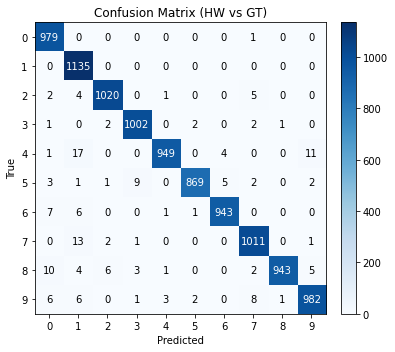

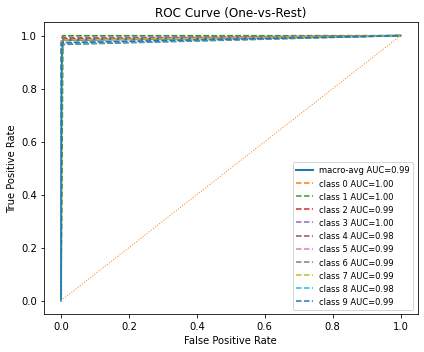

In [34]:
validate_results(metrics_dir=metrics_dir_baseline)

HW vs Ground‑Truth Accuracy : 97.73%
HW vs Golden Accuracy      : 99.99% (golden as truth)

Latency / Throughput:
  latency   : 2.99 ms ± 0.18 (min 2.81, max 9.40)
  throughput: 263224.7 inf/s ± 12419.7
Confusion matrix saved → /home/ubuntu/Documents/ai_on_fpga/metrics/quant/confusion_matrix.png
ROC curve saved → /home/ubuntu/Documents/ai_on_fpga/metrics/quant/roc_curve.png


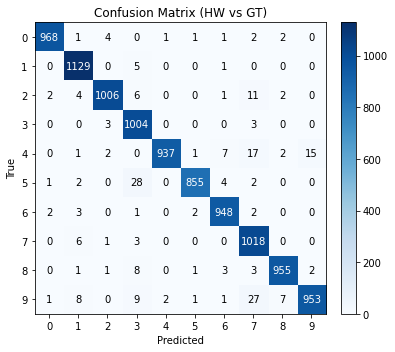

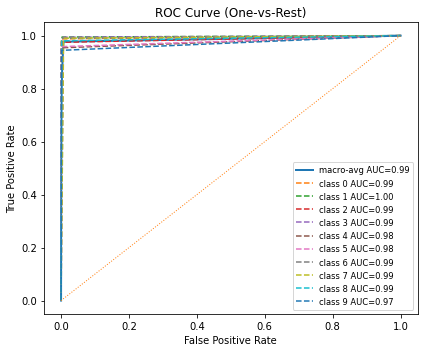

In [35]:
validate_results(metrics_dir=metrics_dir_quant)

HW vs Ground‑Truth Accuracy : 97.73%
HW vs Golden Accuracy      : 99.99% (golden as truth)

Latency / Throughput:
  latency   : 1.73 ms ± 0.16 (min 1.54, max 6.00)
  throughput: 456289.6 inf/s ± 30019.5
Confusion matrix saved → /home/ubuntu/Documents/ai_on_fpga/metrics/quant50/confusion_matrix.png
ROC curve saved → /home/ubuntu/Documents/ai_on_fpga/metrics/quant50/roc_curve.png


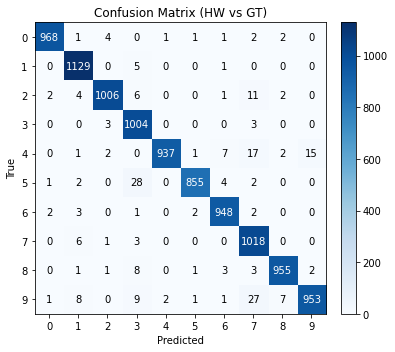

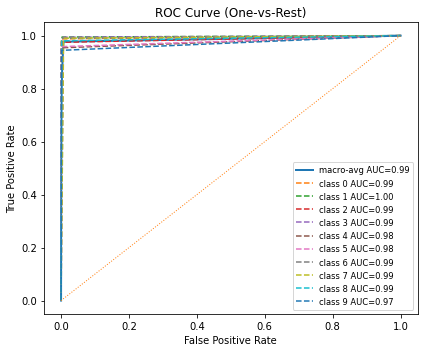

In [36]:
validate_results(metrics_dir=metrics_dir_quant50)